In [1]:
from google.colab import auth
auth.authenticate_user()

In [2]:
import ee
ee.Authenticate()
ee.Initialize(project="ee-gaoliaoran2020")

In [3]:
# import geemap
import datetime
import numpy as np
import math
import geemap

In [13]:
import matplotlib.font_manager as fm
font_paths = fm.findSystemFonts()
font_paths

['/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/

In [14]:
import matplotlib as mpl
mpl.rcParams["font.serif"]

['DejaVu Serif',
 'Bitstream Vera Serif',
 'Computer Modern Roman',
 'New Century Schoolbook',
 'Century Schoolbook L',
 'Utopia',
 'ITC Bookman',
 'Bookman',
 'Nimbus Roman No9 L',
 'Times New Roman',
 'Times',
 'Palatino',
 'Charter',
 'serif']

In [4]:
Supervised_classification = ee.Image("projects/ee-gaoliaoran2020/assets/classification_all_series")
probability_all_series = ee.Image("projects/ee-gaoliaoran2020/assets/probility_all_series")
four = ee.FeatureCollection("projects/ee-gaoliaoran2020/assets/zhangZT/2020_the_second_method/four")
LULC = ee.ImageCollection("ESA/WorldCover/v100").first().clip(four);
image_cropland = LULC.updateMask(LULC.eq(40)).multiply(0).add(1)
probability_max = probability_all_series.reduce(ee.Reducer.max())
classification_cropland = Supervised_classification.add(1).multiply(image_cropland)

In [5]:
def mask_type(image,my_type):
  mask=image.eq(my_type);
  masked_image=image.updateMask(mask);
  return masked_image;

In [6]:
corn_area = mask_type(classification_cropland, 1)
corn_wheat_area = mask_type(classification_cropland, 2)
cotton_area = mask_type(classification_cropland, 3)
wheat_area = mask_type(classification_cropland, 4)
fruit_area = mask_type(classification_cropland, 5)

In [7]:
Map = geemap.Map()
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [8]:
# Map.addLayer(cotton_area.multiply(0).add(1))
# mask_probability_start=probability_max.multiply(cotton_area).gte(0.6).selfMask()
# mask_probability_end=probability_max.multiply(cotton_area).lt(0.7).selfMask()
# probability = mask_probability_start.add(mask_probability_end)
# Map.addLayer(mask_probability_end)

In [9]:
def pixel_count_probability_class(class_image, probability_start, probablility_end):
  class_image = class_image.multiply(0).add(1)
  mask_probability_start = probability_max.multiply(class_image).gte(probability_start).selfMask()
  mask_probability_end = probability_max.multiply(class_image).lt(probablility_end).selfMask()
  probability = mask_probability_start.add(mask_probability_end).eq(2).selfMask()
  countDictionary = probability.reduceRegion(
    reducer=ee.Reducer.count(),
    geometry=four.geometry(),
    scale=10,
    maxPixels=1e13
    );
  number = countDictionary.getInfo()

  value = number["max"]
  print('cropland',value);
  return value

In [ ]:
area = corn_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

In [15]:
image = [0,0,2100761,13152847,4286894,3396940,1767565,784,0,0]

In [16]:
import csv
import os, sys
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 5
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

cornData = np.array(data['max'].values)
cornData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
corn_test.csv


array([0.4024128 , 0.615368  , 0.34792045, 0.4320136 , 0.56032556,
       0.46102837, 0.63092583, 0.5314583 , 0.59014004, 0.55839944,
       0.5312538 , 0.65478456, 0.6202479 , 0.6527195 , 0.4893026 ,
       0.59169054, 0.60346454, 0.6201493 , 0.5334916 , 0.48544225,
       0.45311704])

In [18]:
def count_sample(class_data, probability_start, probablility_end):
  number = 0
  for i in range(len(class_data)):
    data = class_data[i]
    if data >= probability_start and data < probablility_end:
      number = number+1
    else:
      continue
  return number

In [19]:
Data = cornData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [20]:
cron_image_percent = [x/sum(image)*100 for x in image]
cron_point_percent = [x/sum(point)*100 for x in point]

In [21]:
cron_image_percent
cron_point_percent

[0.0,
 0.0,
 0.0,
 4.761904761904762,
 28.57142857142857,
 33.33333333333333,
 33.33333333333333,
 0.0,
 0.0,
 0.0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

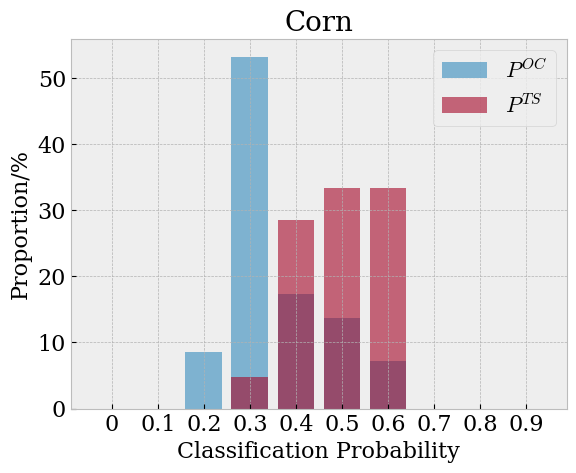

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
# Fixing random state for reproducibility
mpl.rc('font', family='serif')
plt.style.use('bmh')
x_data = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
def plot_bar(ax, x_data, y_data, label):
    ax.bar(x_data, y_data, alpha=0.6, label=label)

color = 'tab:red'
fig, ax = plt.subplots()
plot_bar(ax, x_data, cron_image_percent, '$P^{OC}$')
plot_bar(ax, x_data, cron_point_percent, '$P^{TS}$')
ax.set_ylabel('Proportion/%',size=16)
ax.set_xlabel('Classification Probability',size=16)
ax.set_title('Corn',size=20)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)
ax.legend(loc=0,prop={'size':16})
plt.savefig('corn.png',dpi=330,format='png',bbox_inches='tight')
files.download('corn.png')

In [ ]:
# image_040_041 = pixel_count_probability_class(area, 0.40, 0.41)
# image_041_042 = pixel_count_probability_class(area, 0.41, 0.42)
# image_042_043 = pixel_count_probability_class(area, 0.42, 0.43)
# image_043_044 = pixel_count_probability_class(area, 0.43, 0.44)
# image_044_045 = pixel_count_probability_class(area, 0.44, 0.45)
# image_045_046 = pixel_count_probability_class(area, 0.45, 0.46)
# image_046_047 = pixel_count_probability_class(area, 0.46, 0.47)
# image_047_048 = pixel_count_probability_class(area, 0.47, 0.48)
# image_048_049 = pixel_count_probability_class(area, 0.48, 0.49)
# image_049_050 = pixel_count_probability_class(area, 0.49, 0.50)
# image = [image_040_041,image_041_042,image_042_043,image_043_044,image_044_045,image_045_046,image_046_047,image_047_048,image_048_049,image_049_050]

# Data = cornData
# point_030_031 = count_sample(Data, 0.40, 0.41)
# point_031_032 = count_sample(Data, 0.41, 0.42)
# point_032_033 = count_sample(Data, 0.42, 0.43)
# point_033_034 = count_sample(Data, 0.43, 0.44)
# point_034_035 = count_sample(Data, 0.44, 0.45)
# point_035_036 = count_sample(Data, 0.45, 0.46)
# point_036_037 = count_sample(Data, 0.46, 0.47)
# point_037_038 = count_sample(Data, 0.47, 0.48)
# point_038_039 = count_sample(Data, 0.48, 0.49)
# point_039_040 = count_sample(Data, 0.49, 0.50)
# point = [point_030_031,point_031_032,point_032_033,point_033_034,point_034_035,point_035_036,point_036_037,point_037_038,point_038_039,point_039_040]

# cron_image_percent = [x/sum(image) for x in image]
# cron_point_percent = [x/sum(point) for x in point]

# cron_image_percent
# cron_point_percent

# plt.style.use('bmh')
# x_data = ["0.40","0.41","0.42","0.43","0.44","0.45","0.46","0.47","0.48","0.49"]
# def plot_bar(ax, x_data, y_data, label):
#     ax.bar(x_data, y_data, alpha=0.6, label=label)


# fig, ax = plt.subplots()
# plot_bar(ax, x_data, cron_image_percent, 'Corn Image')
# plot_bar(ax, x_data, cron_point_percent, 'Corn Point')
# ax.set_ylabel('The Percent/%')
# ax.set_xlabel('The Max probability')
# ax.legend()
# # plt.show()
# plt.savefig('corn.svg',format='svg')
# files.download('corn.svg')

In [ ]:
image_00_01 = pixel_count_probability_class(cotton_area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(cotton_area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(cotton_area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(cotton_area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(cotton_area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(cotton_area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(cotton_area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(cotton_area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(cotton_area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(cotton_area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1194355
cropland 6916834
cropland 9029750
cropland 15611966
cropland 13354467
cropland 398683
cropland 0
cropland 0


In [27]:
image = [0
,0
,1194355
,6916834
,9029750
,15611966
,13354467
,398683
,0
,0]

In [28]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 6
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

cottonData = np.array(data['max'].values)
cottonData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
cotton_test.csv


array([0.5725522 , 0.6099655 , 0.5310425 , 0.6782856 , 0.5133895 ,
       0.65504694, 0.55549157, 0.5957753 , 0.4473068 , 0.5619567 ,
       0.6409938 , 0.5955504 , 0.60740024, 0.6533191 , 0.6743271 ,
       0.5868163 , 0.6495694 , 0.5341292 , 0.43915072, 0.5247625 ,
       0.62049943])

In [29]:
Data = cottonData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [30]:
cotton_image_percent = [x/sum(image)*100 for x in image]
cotton_point_percent = [x/sum(point)*100 for x in point]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

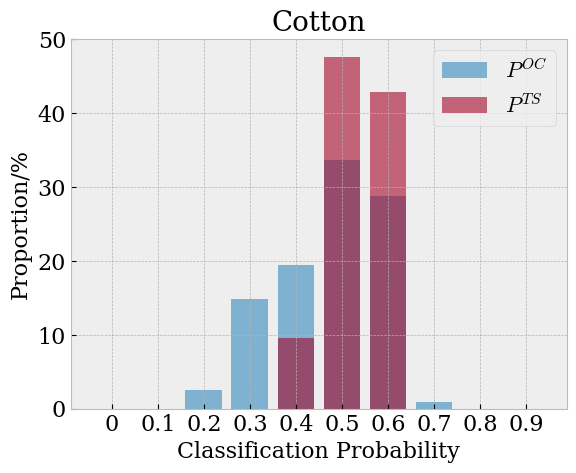

In [33]:
plt.style.use('bmh')
x_data = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
def plot_bar(ax, x_data, y_data, label):
    ax.bar(x_data, y_data, alpha=0.6, label=label)


fig, ax = plt.subplots()
plot_bar(ax, x_data, cotton_image_percent, '$P^{OC}$')
plot_bar(ax, x_data, cotton_point_percent, '$P^{TS}$')
ax.set_ylabel('Proportion/%',size=16)
ax.set_xlabel('Classification Probability',size=16)
ax.set_title('Cotton',size=20)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)
ax.legend(loc=0,prop={'size':16})
plt.savefig('cotton.png',dpi=330,format='png',bbox_inches='tight')
files.download('cotton.png')

In [ ]:
area = fruit_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1205268
cropland 3319601
cropland 2510339
cropland 1801713
cropland 1234595
cropland 92321
cropland 0
cropland 0


In [34]:
image = [0
,0
,1205268
,3319601
,2510339
,1801713
,1234595
,92321
,0
,0]

In [35]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 7
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

forestData = np.array(data['max'].values)
forestData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
forest_test.csv


array([0.3299796 , 0.33720568, 0.47186902, 0.6525414 , 0.6316973 ,
       0.3387018 , 0.6254419 , 0.6191597 , 0.6062391 , 0.6978651 ,
       0.54059285, 0.63272125, 0.61981356, 0.6245842 , 0.61699307,
       0.6987912 , 0.6234597 , 0.6022217 ])

In [36]:
Data = forestData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [37]:
forest_image_percent = [x/sum(image)*100 for x in image]
forest_point_percent = [x/sum(point)*100 for x in point]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

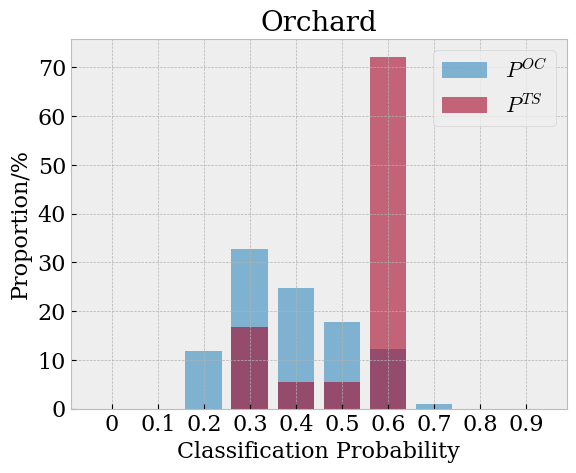

In [39]:
plt.style.use('bmh')
x_data = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
def plot_bar(ax, x_data, y_data, label):
    ax.bar(x_data, y_data, alpha=0.6, label=label)


fig, ax = plt.subplots()
plot_bar(ax, x_data, forest_image_percent, '$P^{OC}$')
plot_bar(ax, x_data, forest_point_percent, '$P^{TS}$')
ax.set_ylabel('Proportion/%',size=16)
ax.set_xlabel('Classification Probability',size=16)
ax.set_title('Orchard',size=20)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)
ax.legend(loc=0,prop={'size':16})
plt.savefig('Orchard.png',dpi=330,format='png',bbox_inches='tight')
files.download('Orchard.png')

In [ ]:
area = wheat_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 511444
cropland 905476
cropland 510822
cropland 97277
cropland 0
cropland 0
cropland 0
cropland 0


In [40]:
image = [0
,0
,511444
,905476
,510822
,97277
,0
,0
,0
,0]

In [41]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 9
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

wheatData = np.array(data['max'].values)
wheatData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
wheat_test.csv


array([0.3128173 , 0.35823327, 0.46870252, 0.49817422])

In [42]:
Data = wheatData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [43]:
wheat_image_percent = [x/sum(image)*100 for x in image]
wheat_point_percent = [x/sum(point)*100 for x in point]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

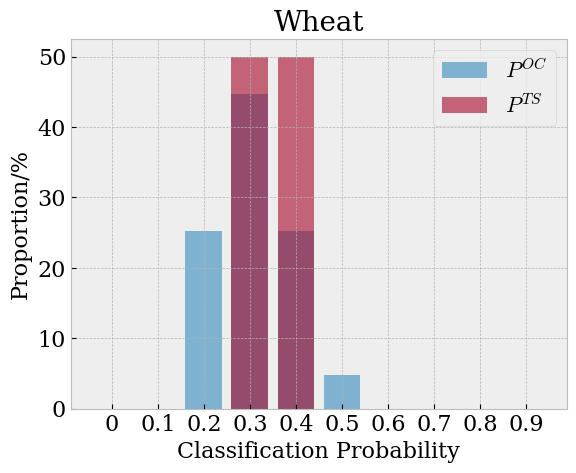

In [45]:
plt.style.use('bmh')
x_data = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
def plot_bar(ax, x_data, y_data, label):
    ax.bar(x_data, y_data, alpha=0.6, label=label)


fig, ax = plt.subplots()
plot_bar(ax, x_data, wheat_image_percent, '$P^{OC}$')
plot_bar(ax, x_data, wheat_point_percent, '$P^{TS}$')
ax.set_ylabel('Proportion/%',size=16)
ax.set_xlabel('Classification Probability',size=16)
ax.set_title('Wheat',size=20)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)
ax.legend(loc=0,prop={'size':16})
plt.savefig('wheat.png',dpi=330,format='png',bbox_inches='tight')
files.download('wheat.png')

In [ ]:
area = corn_wheat_area
image_00_01 = pixel_count_probability_class(area, 0.0, 0.1)
image_01_02 = pixel_count_probability_class(area, 0.1, 0.2)
image_02_03 = pixel_count_probability_class(area, 0.2, 0.3)
image_03_04 = pixel_count_probability_class(area, 0.3, 0.4)
image_04_05 = pixel_count_probability_class(area, 0.4, 0.5)
image_05_06 = pixel_count_probability_class(area, 0.5, 0.6)
image_06_07 = pixel_count_probability_class(area, 0.6, 0.7)
image_07_08 = pixel_count_probability_class(area, 0.7, 0.8)
image_08_09 = pixel_count_probability_class(area, 0.8, 0.9)
image_09_10 = pixel_count_probability_class(area, 0.9, 1.0)
image = [image_00_01,image_01_02,image_02_03,image_03_04,image_04_05,image_05_06,image_06_07,image_07_08,image_08_09,image_09_10]

cropland 0
cropland 0
cropland 1286876
cropland 3333178
cropland 2406587
cropland 130224
cropland 0
cropland 0
cropland 0
cropland 0


In [46]:
image = [0
,0
,1286876
,3333178
,2406587
,130224
,0
,0
,0
,0]

In [47]:
# 打开矢量
csv_origin_dir = r"/content/drive/MyDrive/probility"
os.chdir(csv_origin_dir)
CSV_list = glob.glob("*.csv")
print(CSV_list)
# -----------------------------------------------------------
i = 8
# ------------------------------------------------------------
print(CSV_list[i])
filename =os.path.join(csv_origin_dir, CSV_list[i])
data = pd.read_csv(filename)

corn_wheatData = np.array(data['max'].values)
corn_wheatData

['corn.csv', 'cotton.csv', 'forest.csv', 'wheat.csv', 'wheat_corn.csv', 'corn_test.csv', 'cotton_test.csv', 'forest_test.csv', 'corn_wheat_test.csv', 'wheat_test.csv']
corn_wheat_test.csv


array([0.59556866, 0.3892754 , 0.43025994, 0.390699  , 0.37880507,
       0.44186887, 0.2715612 , 0.31079498, 0.38105318, 0.284923  ,
       0.627439  , 0.43228045, 0.40467545, 0.39652765, 0.38301843,
       0.41836673])

In [48]:
corn_wheatData = [0.3892754 , 0.43025994, 0.390699, 0.37880507,
       0.44186887, 0.2715612, 0.31079498, 0.38105318, 0.627439, 0.43228045, 0.40467545, 0.39652765, 0.38301843,
       0.41836673]
Data = corn_wheatData
point_00_01 = count_sample(Data, 0.0, 0.1)
point_01_02 = count_sample(Data, 0.1, 0.2)
point_02_03 = count_sample(Data, 0.2, 0.3)
point_03_04 = count_sample(Data, 0.3, 0.4)
point_04_05 = count_sample(Data, 0.4, 0.5)
point_05_06 = count_sample(Data, 0.5, 0.6)
point_06_07 = count_sample(Data, 0.6, 0.7)
point_07_08 = count_sample(Data, 0.7, 0.8)
point_08_09 = count_sample(Data, 0.8, 0.9)
point_09_10 = count_sample(Data, 0.9, 1.0)
point = [point_00_01,point_01_02,point_02_03,point_03_04,point_04_05,point_05_06,point_06_07,point_07_08,point_08_09,point_09_10]

In [49]:
corn_wheat_image_percent = [x/sum(image)*100 for x in image]
corn_wheat_point_percent = [x/sum(point)*100 for x in point]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

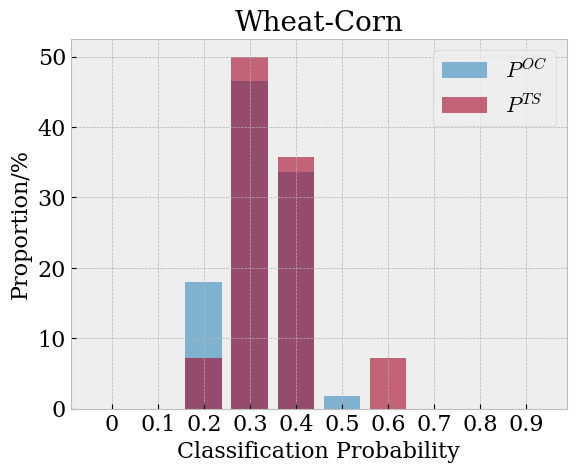

In [51]:
plt.style.use('bmh')
x_data = ["0","0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"]
def plot_bar(ax, x_data, y_data, label):
    ax.bar(x_data, y_data, alpha=0.6, label=label)


fig, ax = plt.subplots()
plot_bar(ax, x_data, corn_wheat_image_percent, '$P^{OC}$')
plot_bar(ax, x_data, corn_wheat_point_percent, '$P^{TS}$')
ax.set_ylabel('Proportion/%',size=16)
ax.set_xlabel('Classification Probability',size=16)
ax.set_title('Wheat-Corn',size=20)
ax.tick_params(axis='y',labelsize=16)
ax.tick_params(axis='x',labelsize=16)
ax.legend(loc=0,prop={'size':16})
plt.savefig('corn_wheat.png',dpi=330,format='png',bbox_inches='tight')
files.download('corn_wheat.png')